<a href="https://colab.research.google.com/github/rudxkush/Machine-Learning/blob/main/Python/Seaborn101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
# Univariate (1 feature) and bivariate (2 features) analysis can be easily done using seaborn.
# For multiple features (3+), we can use tools like pairplot,
# hue/faceting, or other multivariate visualization techniques.

In [111]:
import seaborn as sns

In [112]:
df = sns.load_dataset('tips')

In [113]:
df.head()
# tip is a dependent feature
# apart from that, all the other are independent features

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Correlation with Heatmap

- A correlation heatmap is a colored table that shows how strongly variables are related to each other.
- It helps in feature selection by showing which features are strongly related or redundant.

#### The Pearson Correlation Coefficient
Pearson correlation measures linear relationship only.</br>
$$
r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}
{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}}
$$
$$−1 ≤ r ≤ 1$$
- r = pearson correlation coefficient
- $x_i$ = x variable samples
- $y_i$ = y variable samples
- $\bar{x}$ = mean of values in x variable
- $\bar{y}$ = mean of values in y variable

Ex1 -  
- $x_i$ ~ N(0, 1)
- $y_i = 10*x_i$
- $\bar{x} = \dfrac{\sum x_i}{n_{\text{samples}}}$
- $\bar{y} = \dfrac{\sum y_i}{n_{\text{samples}}}$

r = 1,  because y is an exact positive linear transformation of x.

Ex2 -  
- $x_i$ ~ N(0, 1)
- $y_i = x_i^2$
- $\bar{x} = \dfrac{\sum x_i}{n_{\text{samples}}}$
- $\bar{y} = \dfrac{\sum y_i}{n_{\text{samples}}}$

r = 0, because symmetry of
x around 0 combined with the even function $x^2$ causes covariance terms to cancel out.

Ex3 -  
- $x_i$ ~ N(0, 1)
- $y_i = -10x_i$
- $\bar{x} = \dfrac{\sum x_i}{n_{\text{samples}}}$
- $\bar{y} = \dfrac{\sum y_i}{n_{\text{samples}}}$

r = -1, because y is an exact negative linear transformation of x.

In [114]:
df.select_dtypes(include=['number']).corr()


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

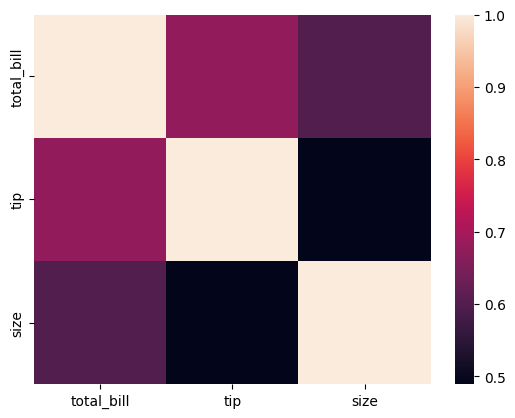

In [115]:
sns.heatmap(df.select_dtypes(include=['number']).corr()) # *args - matrix of correlation

#### JoinPlot
- A join plot allows to study the relationship between 2 numeric variables.
- The central chart display their correlation. It is usually a scatterplot, a hexbin plot, a 2D histogram or a 2D density plot

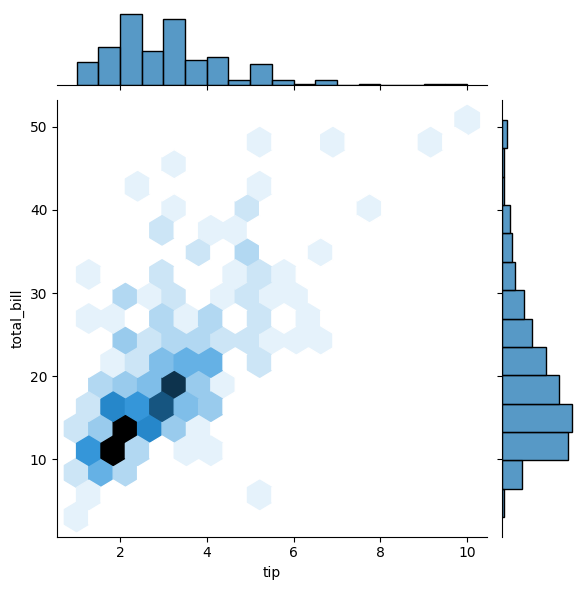

In [116]:
# Bivariate Analysis
sns.jointplot(x='tip',y='total_bill',data=df, kind='hex')

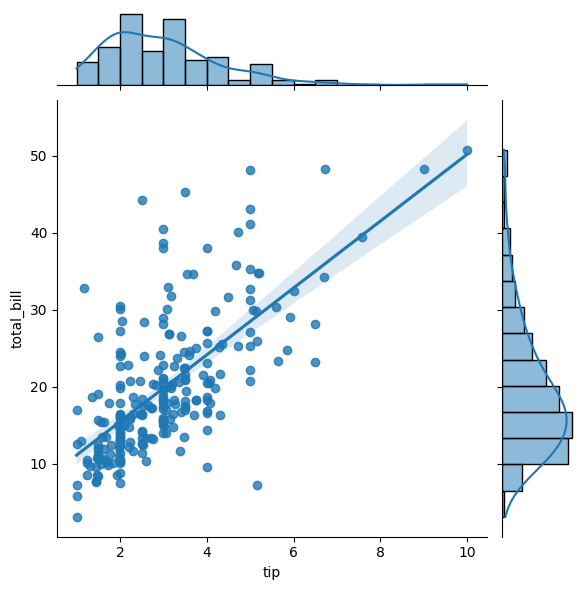

In [117]:
sns.jointplot(x='tip',y='total_bill',data=df,kind='reg')

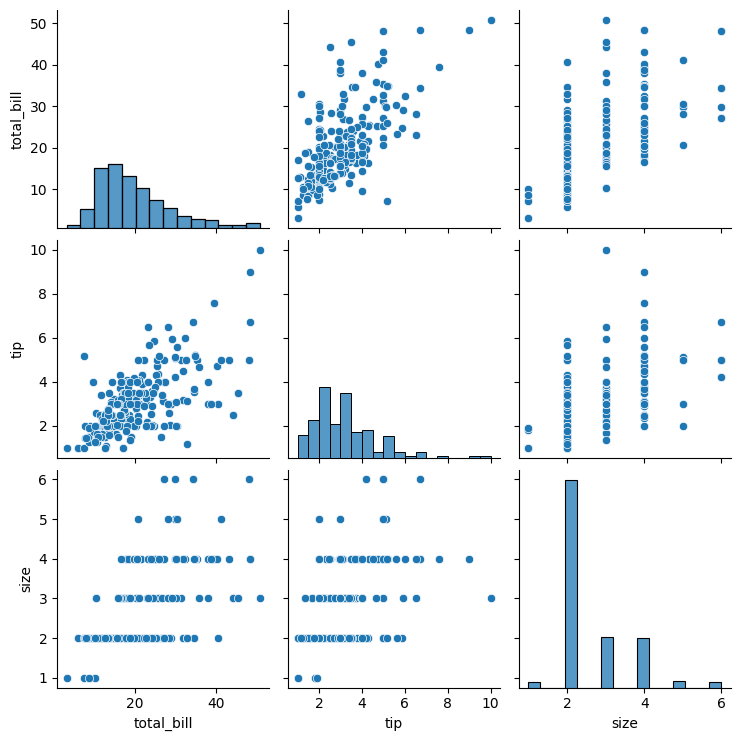

In [118]:
sns.pairplot(df) # Plots pairwise relationships for numeric columns only

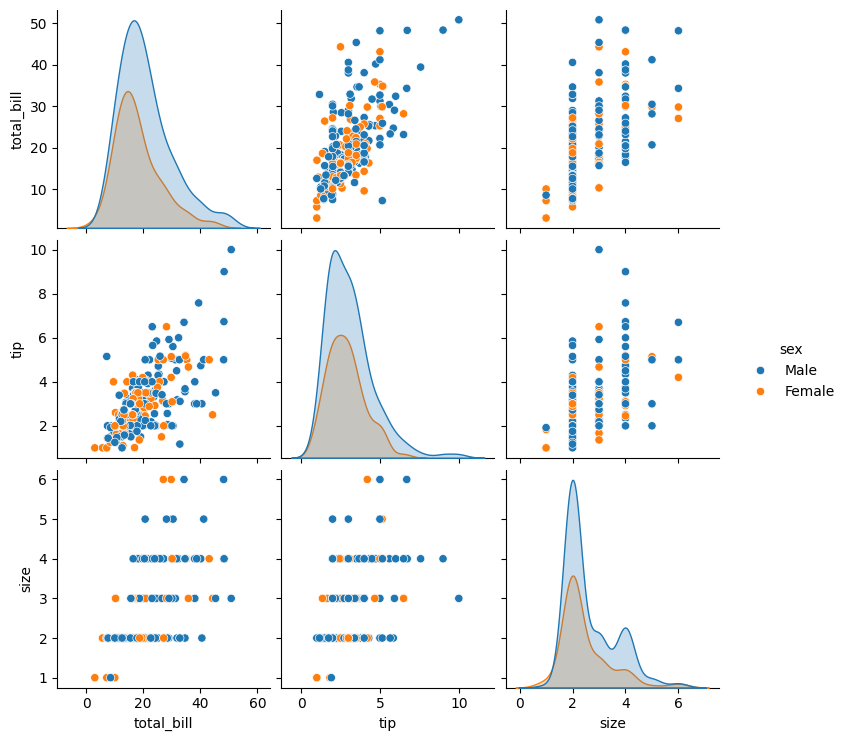

In [119]:
sns.pairplot(df,hue='sex') # hue split the data by a categorical column and color them differently.

In [120]:
print(df['smoker'].value_counts());

smoker
No     151
Yes     93
Name: count, dtype: int64


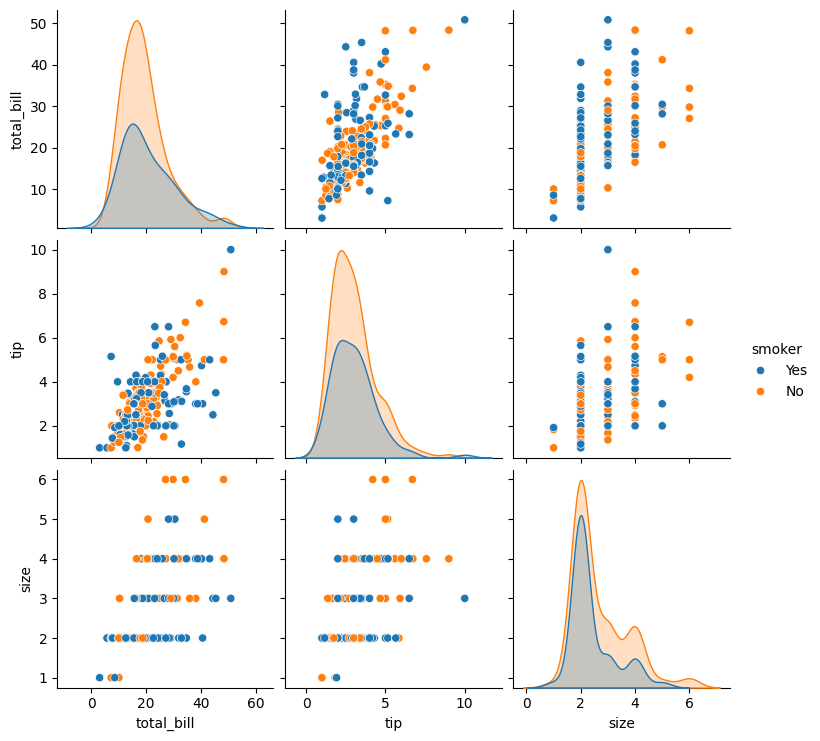

In [121]:
sns.pairplot(df,hue='smoker')

#### Dist plot
Dist plot helps us to check the distribution of the columns feature

/tmp/ipython-input-4235560333.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['tip'])


<Axes: xlabel='tip', ylabel='Density'>

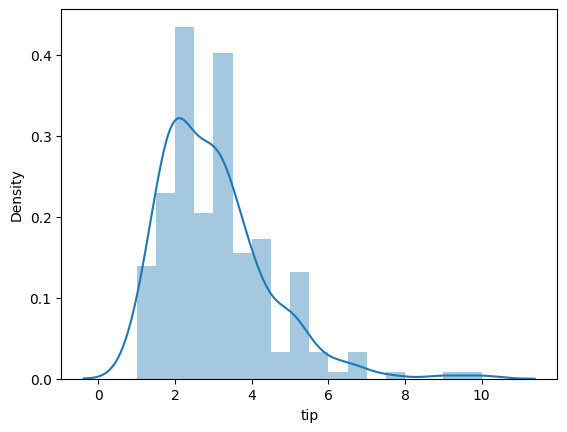

In [122]:
sns.distplot(df['tip'])

<Axes: xlabel='tip', ylabel='Count'>

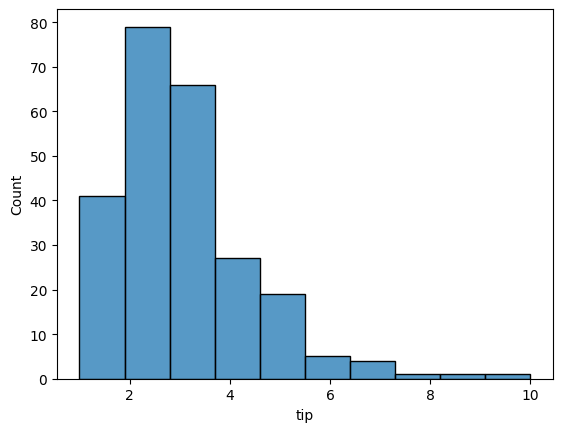

In [123]:
sns.histplot(df['tip'], bins=10) # How many values fall inside each bucket?

/tmp/ipython-input-3469179876.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['tip'],kde=True,bins=10)


<Axes: xlabel='tip', ylabel='Density'>

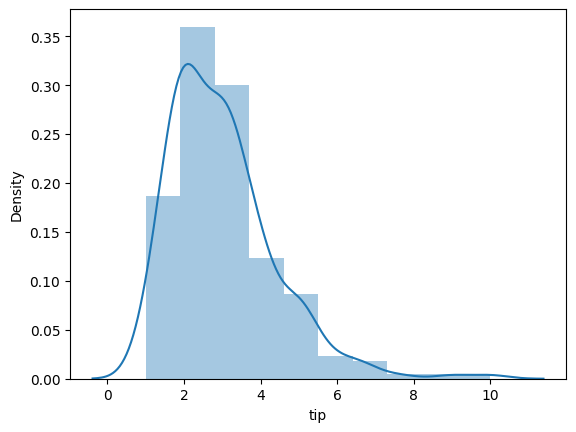

In [124]:
# How densely packed are values around each region?
sns.distplot(df['tip'],kde=True,bins=10)
# Kernel Destination Estimation
# estimate the probability density function (PDF) of a random variable
# by smoothing data points with a kernel function
# CDF(2) ≈ 0.35, About 35% of all tips are ≤ $2

#### Categorical Plots
Seaborn also helps us in doing the analysis on Categorical Data points. In this section we will discuss about

- boxplot
- violinplot
- countplot
- bar plot

/tmp/ipython-input-1541564609.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex',data=df, palette=['blue','orange'])


<Axes: xlabel='sex', ylabel='count'>

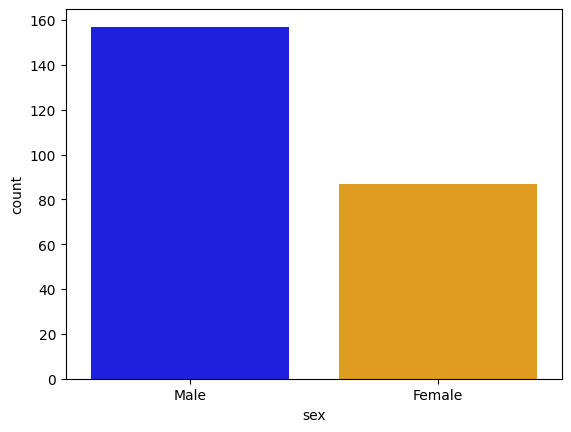

In [125]:
## Count plot
sns.countplot(x='sex',data=df, palette=['blue','orange'])

/tmp/ipython-input-1176670156.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='sex',data=df, palette=['blue','orange'])


<Axes: xlabel='count', ylabel='sex'>

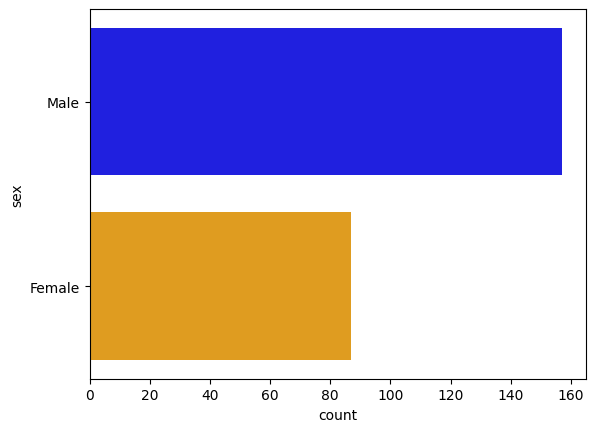

In [126]:
sns.countplot(y='sex',data=df, palette=['blue','orange'])

/tmp/ipython-input-2912692565.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_bill',y='sex',data=df, palette=['black','pink'])


<Axes: xlabel='total_bill', ylabel='sex'>

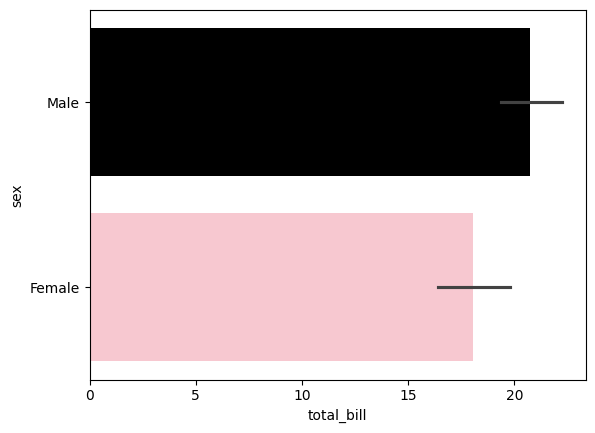

In [127]:
## Bar plot
sns.barplot(x='total_bill',y='sex',data=df, palette=['black','pink'])

/tmp/ipython-input-1661043294.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y='total_bill', data=df, palette=['blue','orange'])


<Axes: xlabel='smoker', ylabel='total_bill'>

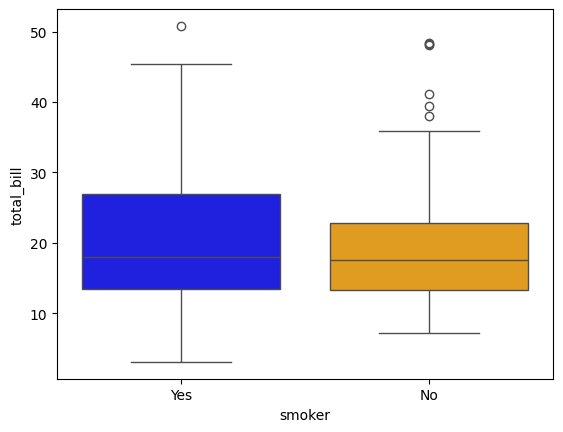

In [128]:
## Box plot
sns.boxplot(x='smoker', y='total_bill', data=df, palette=['blue','orange'])

#### Box Plot – Five Number Summary

| Statistic   | Smokers (Yes) | Non-Smokers (No) |
|-------------|---------------|------------------|
| Minimum     | ~3           | ~3              |
| Q1          | ~13          | ~13             |
| Median (Q2) | ~18          | ~18             |
| Q3          | ~27          | ~22             |
| Maximum     | ~45          | ~35             |

**Think of it this way:**
- Bottom 25% → below \$13
- Middle 50% → between \$13 and \$27 ← this is the IQR (50% of smokers have bills within a \$14 range from \$13 to \$27)
- Top 25% → above \$27 </br>
**How to read Q1:** 25% of smokers have a total bill at or below ~13 dollars.
- Take all smoker rows only
- Sort bills from lowest to highest
- The value at the 25% mark = Q1 = ~13 dollars

<Axes: >

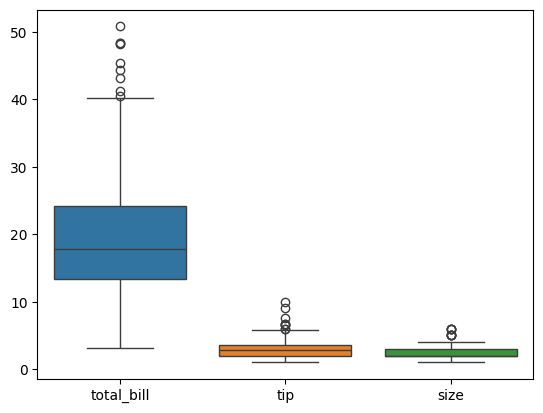

In [129]:
sns.boxplot(data=df, orient='v')